In [1]:
!pip install rdkit-pypi

#important : 
# need to download it from link
# https://www.kaggle.com/datasets/jainam213/rdkit-wheels?utm_source=chatgpt.com
# !!

!pip install /kaggle/input/rdkit-library/rdkit-2025.3.3-cp311-cp311-manylinux_2_28_x86_64.whl

import numpy as np
import pandas as pd
import os

ERROR: Could not find a version that satisfies the requirement rdkit-pypi (from versions: none)
ERROR: No matching distribution found for rdkit-pypi
Processing /kaggle/input/rdkit-library/rdkit-2025.3.3-cp311-cp311-manylinux_2_28_x86_64.whl


In [2]:
import os
print(os.listdir('/kaggle/input/rdkit-library/'))


['rdkit-2025.3.3-cp311-cp311-manylinux_2_28_x86_64.whl']


In [3]:
modules_to_check = [
    "Chem",
    "DataStructs",
    "RDLogger",
    "Geometry",
    "Chem.AllChem",
    "Chem.Draw"
]

for mod_name in modules_to_check:
    try:
        module = __import__("rdkit." + mod_name, fromlist=["*"])
        print(f"✅ RDKit.{mod_name} is installed and ready to use!")
    except ImportError:
        print(f"❌ RDKit.{mod_name} is NOT installed or not available.")


✅ RDKit.Chem is installed and ready to use!
✅ RDKit.DataStructs is installed and ready to use!
✅ RDKit.RDLogger is installed and ready to use!
✅ RDKit.Geometry is installed and ready to use!
✅ RDKit.Chem.AllChem is installed and ready to use!
✅ RDKit.Chem.Draw is installed and ready to use!


In [4]:
df_train_dataset_1 = pd.DataFrame(pd.read_csv('/kaggle/input/neurips-open-polymer-prediction-2025/train_supplement/dataset1.csv'))
df_train_dataset_2 = pd.DataFrame(pd.read_csv('/kaggle/input/neurips-open-polymer-prediction-2025/train_supplement/dataset2.csv'))
df_train_dataset_3 = pd.DataFrame(pd.read_csv('/kaggle/input/neurips-open-polymer-prediction-2025/train_supplement/dataset3.csv'))
df_train_dataset_4 = pd.DataFrame(pd.read_csv('/kaggle/input/neurips-open-polymer-prediction-2025/train_supplement/dataset4.csv'))

df_test = pd.DataFrame(pd.read_csv('/kaggle/input/neurips-open-polymer-prediction-2025/test.csv'))
df_train = pd.DataFrame(pd.read_csv('/kaggle/input/neurips-open-polymer-prediction-2025/train.csv'))

In [5]:
df_train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


id                                             SMILES  Tg       FFV  \
0   87817                         *CC(*)c1ccccc1C(=O)OCCCCCC NaN  0.374645   
1  106919  *Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5... NaN  0.370410   
2  388772  *Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(... NaN  0.378860   
3  519416  *Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N*)... NaN  0.387324   
4  539187  *Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N... NaN  0.355470   

         Tc  Density  Rg  
0  0.205667      NaN NaN  
1       NaN      NaN NaN  
2       NaN      NaN NaN  
3       NaN      NaN NaN  
4       NaN      NaN NaN

In [6]:
df_test.head()

id                                             SMILES
0  1109053969  *Oc1ccc(C=NN=Cc2ccc(Oc3ccc(C(c4ccc(*)cc4)(C(F)...
1  1422188626  *Oc1ccc(C(C)(C)c2ccc(Oc3ccc(C(=O)c4cccc(C(=O)c...
2  2032016830  *c1cccc(OCCCCCCCCOc2cccc(N3C(=O)c4ccc(-c5cccc6...

In [7]:
df_train_dataset_1.head()


SMILES  TC_mean
0   */C(=C(\c1ccccc1)c1ccc(*)cc1)c1ccccc1   0.3380
1      */C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F   0.1020
2  */C=C(/*)C#CCCCCCCCCCCCCCCCCCCCCC(=O)O   0.4105
3     */C=C(/*)CCCCCCCCCCCCCCCCCCCCC(=O)O   0.4030
4                                 */C=C/*   0.5260

In [8]:
df_train_dataset_2.head()

SMILES
0              */C(=C(/*)c1ccc(C(C)(C)C)cc1)c1ccccc1
1                  */C(=C(/*)c1ccc(CCCC)cc1)c1ccccc1
2             */C(=C(/*)c1ccc(Oc2ccccc2)cc1)c1ccccc1
3  */C(=C(/*)c1ccc([Si](C(C)C)(C(C)C)C(C)C)cc1)c1...
4           */C(=C(/*)c1ccc([Si](C)(C)C)cc1)c1ccccc1

In [9]:
df_train_dataset_3.head()

SMILES          Tg
0  *=Nc1ccc(N=C(C)Nc2ccc(-c3ccc(NC(=*)C)c(C(=O)O)...   89.380459
1   *C(=O)OC(=O)COc1ccc(OCC(=O)OC(=O)c2ccc(*)nc2)cc1  155.970957
2  *C(=O)c1ccc(C(=O)c2ccc(C=C3CCC(=Cc4ccc(*)cc4)C...  192.209684
3  *C=C(*)c1ccc(OCCCCCC(=O)Oc2c(F)c(F)c(F)c(F)c2F...   73.831985
4                     *C=CC1C=CC(*)c2ccc(CCCCCC)cc21    9.704073

In [10]:
df_train_dataset_4.head()

SMILES       FFV
0  *C(=O)NNC(=O)c1ccc([Si](c2ccccc2)(c2ccccc2)c2c...  0.372725
1  *C(=O)NNC(=O)c1ccc([Si](c2ccccc2)(c2ccccc2)c2c...  0.365478
2  *C(=O)Nc1cc(NC(=O)c2ccc3[nH]c(-c4cc(-c5nc6cc(*...  0.376377
3  *C(=O)Nc1ccc(-c2cc(-c3ccccc3)cc(-c3ccc(NC(=O)c...  0.376939
4  *C(=O)Nc1ccc(-c2ccc(NC(=O)c3ccc4c(c3)C(=O)N(c3...  0.355235

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

print(f'Null in train : /n{df_train.isnull().sum()}')
print('-'*40)
print(f'describe train :/n{df_train.describe()}')
print('-'*40)


Null in train : /nid            0
SMILES        0
Tg         7462
FFV         943
Tc         7236
Density    7360
Rg         7359
dtype: int64
----------------------------------------
describe train :/n                 id          Tg          FFV          Tc     Density  \
count  7.973000e+03  511.000000  7030.000000  737.000000  613.000000   
mean   1.080050e+09   96.452314     0.367212    0.256334    0.985484   
std    6.218241e+08  111.228279     0.029609    0.089538    0.146189   
min    8.781700e+04 -148.029738     0.226992    0.046500    0.748691   
25%    5.376641e+08   13.674509     0.349549    0.186000    0.890243   
50%    1.079079e+09   74.040183     0.364264    0.236000    0.948193   
75%    1.621708e+09  161.147595     0.380790    0.330500    1.062096   
max    2.147438e+09  472.250000     0.777097    0.524000    1.840999   

               Rg  
count  614.000000  
mean    16.419787  
std      4.608640  
min      9.728355  
25%     12.540328  
50%     15.052194  
75%     2

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


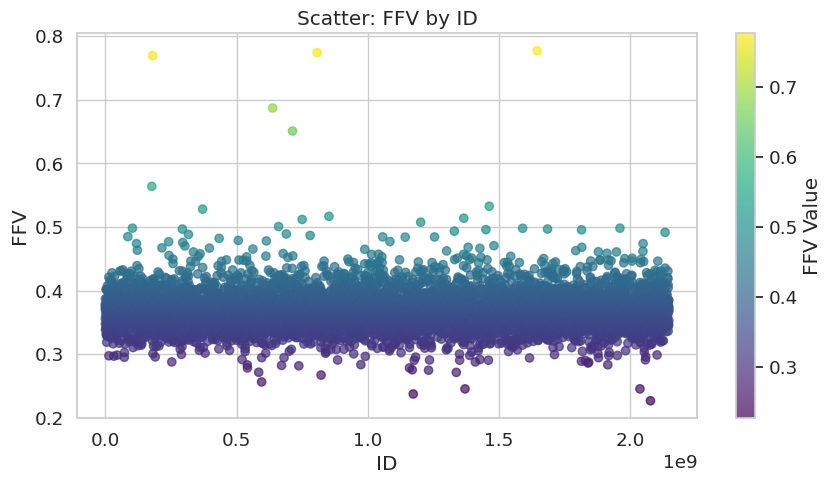

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(df_train['id'], df_train['FFV'], c=df_train['FFV'], cmap='viridis', alpha=0.7)
plt.title('Scatter: FFV by ID')
plt.xlabel('ID')
plt.ylabel('FFV')
plt.colorbar(label='FFV Value')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


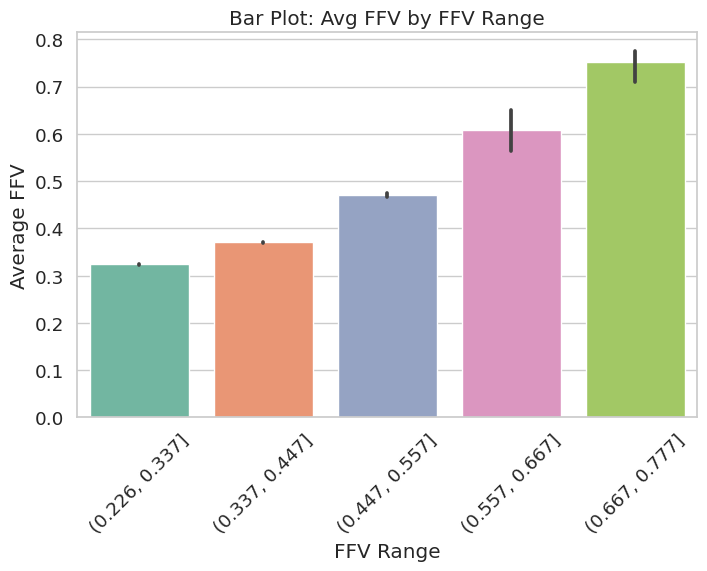

In [13]:
df_train['FFV_bin'] = pd.cut(df_train['FFV'], bins=5)

# גרף עמודות
plt.figure(figsize=(8, 5))
sns.barplot(x=df_train['FFV_bin'], y=df_train['FFV'], palette='Set2')
plt.title('Bar Plot: Avg FFV by FFV Range')
plt.xlabel('FFV Range')
plt.ylabel('Average FFV')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_13/3190032177.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


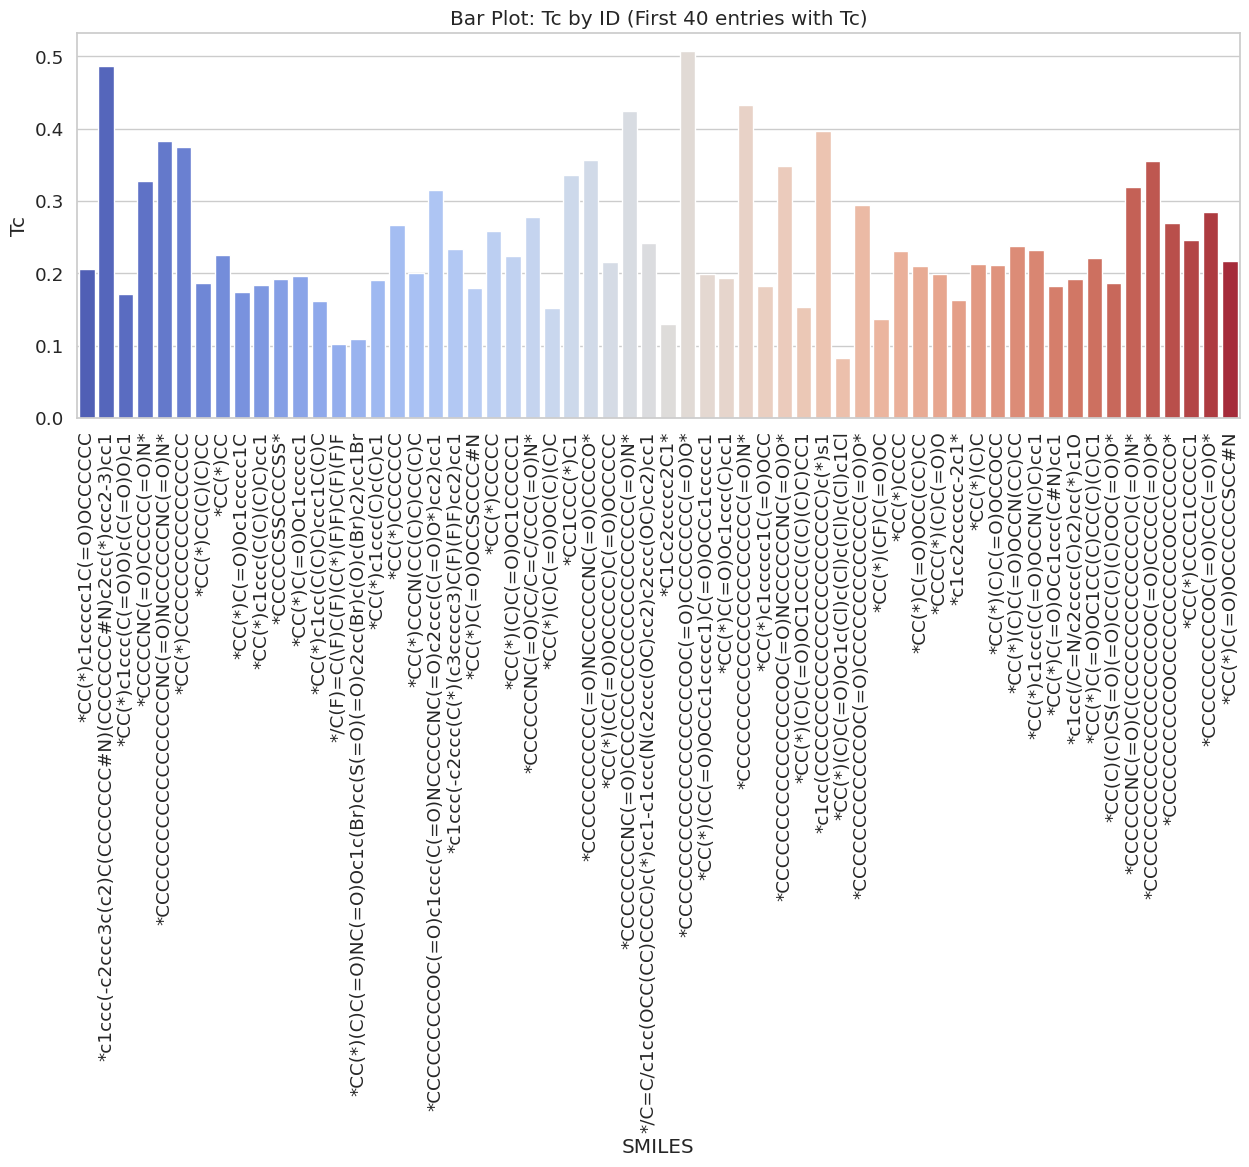

In [14]:
df_tc_notnull = df_train[df_train['Tc'].notna()]
plt.figure(figsize=(15, 5))
sns.barplot(x='SMILES', y='Tc', data=df_tc_notnull[:60], palette='coolwarm')
plt.title('Bar Plot: Tc by ID (First 40 entries with Tc)')
plt.xlabel('SMILES')
plt.ylabel('Tc')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [15]:
con_data = df_train.merge(df_train_dataset_1, on='SMILES', how='outer') \
                   .merge(df_train_dataset_2, on='SMILES', how='outer') \
                   .merge(df_train_dataset_3, on='SMILES', how='outer') \
                   .merge(df_train_dataset_4, on='SMILES', how='outer')
print(con_data.shape)
print(con_data.isnull().sum())

(10396, 11)
id          2385
SMILES         0
Tg_x        9884
FFV_x       3355
Tc          9633
Density     9764
Rg          9763
FFV_bin     3355
TC_mean     9502
Tg_y       10350
FFV_y       9534
dtype: int64


In [16]:
if('Tg_y' in con_data.columns):
    con_data.drop('Tg_y', axis=1, inplace=True)
    print('Tg_y deleted')
if('Tg_x' in con_data.columns):
    con_data.drop('Tg_x', axis=1, inplace=True)
    print('Tg_x deleted')

Tg_y deleted
Tg_x deleted


In [17]:
con_data = con_data.dropna(subset=['id'])
con_data.shape

(8011, 9)

In [18]:
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem,Lipinski, rdMolDescriptors
from rdkit.Chem import Draw
from IPython.display import display

In [19]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, rdMolDescriptors, Draw
import pandas as pd

def calc_features(smiles: str) -> dict:
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return {
        "SMILES": smiles,
        "origin": mol,  # אם לא נדרש – אפשר למחוק
        "MolWt": Descriptors.MolWt(mol),
        "NumAromaticRings": Lipinski.NumAromaticRings(mol),
        "NumRings": rdMolDescriptors.CalcNumRings(mol),
        "FractionCSP3": Descriptors.FractionCSP3(mol),
        "NumRotatableBonds": Lipinski.NumRotatableBonds(mol),
        "TPSA": Descriptors.TPSA(mol),
        "HBA": Lipinski.NumHAcceptors(mol),
        "HBD": Lipinski.NumHDonors(mol),
        "BalabanJ": Descriptors.BalabanJ(mol),
        "MolLogP": Descriptors.MolLogP(mol),
    }

# איסוף התכונות
mols = []
for i in range(df_train.shape[0]):  # או כל תחום אחר שתרצה
    smiles = df_train["SMILES"][i]
    mol_dict = calc_features(smiles)
    if mol_dict is not None:
        mols.append(mol_dict)

# הפיכה ל-DataFrame
df_features_train = pd.DataFrame(mols)

# הסרת העמודה origin אם לא דרושה בטבלה
df_features = df_features_train.drop(columns=["origin"])

# הצגה
display(df_features)
print(df_features.shape)
print(df_train.shape)

SMILES     MolWt  \
0                            *CC(*)c1ccccc1C(=O)OCCCCCC   232.323   
1     *Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...   598.919   
2     *Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...  1003.207   
3     *Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N*)...   542.726   
4     *Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N...   965.154   
...                                                 ...       ...   
7968       *Oc1cc(CCCCCCCC)cc(OC(=O)c2cccc(C(*)=O)c2)c1   352.430   
7969  *C(=O)OCCN(CCOC(=O)c1ccc2c(c1)C(=O)N(c1cccc(N3...   750.680   
7970  *c1cc(C(=O)NCCCCCCCC)cc(N2C(=O)c3ccc(-c4ccc5c(...   521.573   
7971                                   *C=C(*)c1ccccc1C   116.163   
7972  *c1ccc(OCCCCCCCCCCCOC(=O)CCCCC(=O)OCCCCCCCCCCC...   721.017   

      NumAromaticRings  NumRings  FractionCSP3  NumRotatableBonds    TPSA  \
0                    1         1      0.533333                  8   26.30   
1                    4         5      0.441860                 16   24.06   
2                    8        10      0.145161                 15  122.27   
3                    6         6      0.100000                  7   24.06   
4                    4         6      0.518519                 34  182.28   
...                ...       ...           ...                ...     ...   
7968                 2         2      0.363636                 11   52.60   
7969                 5         7      0.100000                 13  198.46   
7970                 3         5      0.258065                 10  103.86   
7971                 1         1      0.111111                  1    0.00   
7972                 3         3      0.619048                 32   96.84   

      HBA  HBD  BalabanJ   MolLogP  
0       2    0  2.563477   3.98170  
1       2    2  1.451540  12.35960  
2       9    0  0.743739  14.21700  
3       2    2  1.888931  11.00768  
4      14    0  0.862097  11.84500  
...   ...  ...       ...       ...  
7968    4    0  2.027335   5.34140  
7969   13    0  1.004807   6.13530  
7970    5    1  1.342325   4.47940  
7971    0    0  3.136392   2.39202  
7972    9    0  0.972774   9.68070  

[7973 rows x 11 columns]

(7973, 11)
(7973, 8)


In [20]:
mol_test = []
for i in range (df_test.shape[0]):
    smiles = df_train["SMILES"][i]
    mol_dict = calc_features(smiles)
    if mol_dict is not None:
        mol_test.append(mol_dict)
# הפיכה ל-DataFrame
df_features_test = pd.DataFrame(mol_test)

# הסרת העמודה origin אם לא דרושה בטבלה
df_train_process = df_features_test.drop(columns=["origin"])

# הצגה
display(df_train_process)
print(df_train_process.shape)
print(df_test.shape)

SMILES     MolWt  \
0                         *CC(*)c1ccccc1C(=O)OCCCCCC   232.323   
1  *Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...   598.919   
2  *Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...  1003.207   

   NumAromaticRings  NumRings  FractionCSP3  NumRotatableBonds    TPSA  HBA  \
0                 1         1      0.533333                  8   26.30    2   
1                 4         5      0.441860                 16   24.06    2   
2                 8        10      0.145161                 15  122.27    9   

   HBD  BalabanJ  MolLogP  
0    0  2.563477   3.9817  
1    2  1.451540  12.3596  
2    0  0.743739  14.2170

(3, 11)
(3, 2)


In [21]:
list_target = ['Tg','FFV','Tc','Density','Rg'] 
_df_train_ = df_train.drop(columns=['FFV_bin'])
_df_train_1 = pd.merge(_df_train_, df_features, on='SMILES')
_df_train_1

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


id                                             SMILES  \
0          87817                         *CC(*)c1ccccc1C(=O)OCCCCCC   
1         106919  *Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...   
2         388772  *Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...   
3         519416  *Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N*)...   
4         539187  *Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N...   
...          ...                                                ...   
7968  2146592435       *Oc1cc(CCCCCCCC)cc(OC(=O)c2cccc(C(*)=O)c2)c1   
7969  2146810552  *C(=O)OCCN(CCOC(=O)c1ccc2c(c1)C(=O)N(c1cccc(N3...   
7970  2147191531  *c1cc(C(=O)NCCCCCCCC)cc(N2C(=O)c3ccc(-c4ccc5c(...   
7971  2147435020                                   *C=C(*)c1ccccc1C   
7972  2147438299  *c1ccc(OCCCCCCCCCCCOC(=O)CCCCC(=O)OCCCCCCCCCCC...   

              Tg       FFV        Tc  Density  Rg     MolWt  NumAromaticRings  \
0            NaN  0.374645  0.205667      NaN NaN   232.323                 1   
1            NaN  0.370410       NaN      NaN NaN   598.919                 4   
2            NaN  0.378860       NaN      NaN NaN  1003.207                 8   
3            NaN  0.387324       NaN      NaN NaN   542.726                 6   
4            NaN  0.355470       NaN      NaN NaN   965.154                 4   
...          ...       ...       ...      ...  ..       ...               ...   
7968         NaN  0.367498       NaN      NaN NaN   352.430                 2   
7969         NaN  0.353280       NaN      NaN NaN   750.680                 5   
7970         NaN  0.369411       NaN      NaN NaN   521.573                 3   
7971  261.662355       NaN       NaN      NaN NaN   116.163                 1   
7972         NaN  0.374049       NaN      NaN NaN   721.017                 3   

      NumRings  FractionCSP3  NumRotatableBonds    TPSA  HBA  HBD  BalabanJ  \
0            1      0.533333                  8   26.30    2    0  2.563477   
1            5      0.441860                 16   24.06    2    2  1.451540   
2           10      0.145161                 15  122.27    9    0  0.743739   
3            6      0.100000                  7   24.06    2    2  1.888931   
4            6      0.518519                 34  182.28   14    0  0.862097   
...        ...           ...                ...     ...  ...  ...       ...   
7968         2      0.363636                 11   52.60    4    0  2.027335   
7969         7      0.100000                 13  198.46   13    0  1.004807   
7970         5      0.258065                 10  103.86    5    1  1.342325   
7971         1      0.111111                  1    0.00    0    0  3.136392   
7972         3      0.619048                 32   96.84    9    0  0.972774   

       MolLogP  
0      3.98170  
1     12.35960  
2     14.21700  
3     11.00768  
4     11.84500  
...        ...  
7968   5.34140  
7969   6.13530  
7970   4.47940  
7971   2.39202  
7972   9.68070  

[7973 rows x 17 columns]

In [22]:
print(f'null : {_df_train_1.isnull().sum()}')


null : id                      0
SMILES                  0
Tg                   7462
FFV                   943
Tc                   7236
Density              7360
Rg                   7359
MolWt                   0
NumAromaticRings        0
NumRings                0
FractionCSP3            0
NumRotatableBonds       0
TPSA                    0
HBA                     0
HBD                     0
BalabanJ                0
MolLogP                 0
dtype: int64


In [23]:
list_target = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']

# מילונים לשמירת זוגות DataFrame
X_dict = {}
Y_dict = {}

for target in list_target:
    # בחר שורות שבהן העמודה target לא ריקה
    df_x = _df_train_1[_df_train_1[target].notnull()].copy()
    # בחר שורות שבהן העמודה target ריקה
    df_y = _df_train_1[_df_train_1[target].isnull()].copy()

    # עמודות מטרות להוציא (כל העמודות חוץ מהעמודה target)
    cols_to_drop = [col for col in list_target if col != target]

    # מחיקת העמודות שאינן העמודה target
    df_x.drop(columns=cols_to_drop, inplace=True)
    df_y.drop(columns=cols_to_drop, inplace=True)
    
    df_x.drop(columns='id', inplace=True)
    df_y.drop(columns='id', inplace=True)

    df_x.drop(columns='SMILES', inplace=True)
    df_y.drop(columns='SMILES', inplace=True)

    # שמירת התוצאות במילונים
    X_dict[f"{target}"] = df_x
    Y_dict[f"{target}"] = df_y

# דוגמה להדפסת הצורה של Tg_x ו-Tg_y
for i in list_target:
    print(i)
    print(X_dict[f'{i}'].shape)
    print(Y_dict[f'{i}'].shape)


Tg
(511, 11)
(7462, 11)
FFV
(7030, 11)
(943, 11)
Tc
(737, 11)
(7236, 11)
Density
(613, 11)
(7360, 11)
Rg
(614, 11)
(7359, 11)


In [24]:
print(X_dict['Tg'].head)

<bound method NDFrame.head of               Tg    MolWt  NumAromaticRings  NumRings  FractionCSP3  \
40    208.639749  185.183                 0         0      0.571429   
57    -41.266724  268.538                 0         0      1.000000   
63    -17.282022  138.254                 0         0      0.800000   
108     4.250403  494.588                 2         2      0.428571   
123   168.526313  466.672                 4         4      0.461538   
...          ...      ...               ...       ...           ...   
7863   38.160660  408.508                 2         2      0.200000   
7868  164.322463  274.316                 1         2      0.500000   
7889   35.475235  508.658                 3         3      0.294118   
7911   95.741049  214.261                 0         1      0.909091   
7971  261.662355  116.163                 1         1      0.111111   

      NumRotatableBonds    TPSA  HBA  HBD  BalabanJ  MolLogP  
40                    6   87.30    4    3  3.709964 -2

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def train_linear_regression(df, target_col, test_size=0.3, random_state=42):
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    predict = model.predict(X_test_scaled)

    return model, predict, scaler

def train_random_forest(df, target_col, test_size=0.3, random_state=42):
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestRegressor(random_state=random_state)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    return model, y_pred, scaler

def train_gradient_boosting(df, target_col, test_size=0.3, random_state=42):
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = GradientBoostingRegressor(random_state=random_state)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    return model, y_pred, scaler

def train_svr(df, target_col, test_size=0.3, random_state=42):
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVR()
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    return model, y_pred, scaler 




In [26]:
list_target


['Tg', 'FFV', 'Tc', 'Density', 'Rg']

In [27]:
models = []
scalers = []
list_pred = []



for i in list_target:
    model_lr,predict_lr,scaler_lr = train_linear_regression(X_dict[i],i)
    
    model_rf,predict_rf,scaler_rf= train_random_forest(X_dict[i], i)
    
    
    model_gb,predict_gb,scaler_gb= train_gradient_boosting(X_dict[i],i)
    
    
    model_svr,predict_svr,scaler_svr= train_svr(X_dict[i], i)

    print("="*50)
    print(f"📈 Linear Regression - מספר תחזיות: {len(predict_lr)} 📊")
    print(f"🌲 Random Forest - מספר תחזיות: {len(predict_rf)} 🌳")
    print(f"🚀 Gradient Boosting - מספר תחזיות: {len(predict_gb)} ⚡")
    print(f"🎯 SVR (Support Vector Regression) - מספר תחזיות: {len(predict_svr)} 🤖")
    print("="*50)

    list_pred.append(({
        
            'linear_regression': predict_lr,
            'random_forest': predict_rf,
            'gradient_boosting': predict_gb,
            'svr': predict_svr
        
    }))
    models.append(({
        
            'linear_regression': model_lr,
            'random_forest': model_rf,
            'gradient_boosting': model_gb,
            'svr': model_svr
        
    }))
    scalers.append(({
        
            'linear_regression': scaler_lr,
            'random_forest': scaler_rf,
            'gradient_boosting': scaler_gb,
            'svr': scaler_svr
        
    }))

📈 Linear Regression - מספר תחזיות: 154 📊
🌲 Random Forest - מספר תחזיות: 154 🌳
🚀 Gradient Boosting - מספר תחזיות: 154 ⚡
🎯 SVR (Support Vector Regression) - מספר תחזיות: 154 🤖
📈 Linear Regression - מספר תחזיות: 2109 📊
🌲 Random Forest - מספר תחזיות: 2109 🌳
🚀 Gradient Boosting - מספר תחזיות: 2109 ⚡
🎯 SVR (Support Vector Regression) - מספר תחזיות: 2109 🤖
📈 Linear Regression - מספר תחזיות: 222 📊
🌲 Random Forest - מספר תחזיות: 222 🌳
🚀 Gradient Boosting - מספר תחזיות: 222 ⚡
🎯 SVR (Support Vector Regression) - מספר תחזיות: 222 🤖
📈 Linear Regression - מספר תחזיות: 184 📊
🌲 Random Forest - מספר תחזיות: 184 🌳
🚀 Gradient Boosting - מספר תחזיות: 184 ⚡
🎯 SVR (Support Vector Regression) - מספר תחזיות: 184 🤖
📈 Linear Regression - מספר תחזיות: 185 📊
🌲 Random Forest - מספר תחזיות: 185 🌳
🚀 Gradient Boosting - מספר תחזיות: 185 ⚡
🎯 SVR (Support Vector Regression) - מספר תחזיות: 185 🤖


In [28]:
try:
    df_1 = pd.DataFrame({k: list_pred[0][k] for k in list(list_pred[0].keys())[0:4]})
    df_2 = pd.DataFrame({k: list_pred[1][k] for k in list(list_pred[1].keys())[0:4]})
    df_3 = pd.DataFrame({k: list_pred[2][k] for k in list(list_pred[2].keys())[0:4]})
    df_4 = pd.DataFrame({k: list_pred[3][k] for k in list(list_pred[3].keys())[0:4]})
    df_5 = pd.DataFrame({k: list_pred[4][k] for k in list(list_pred[4].keys())[0:4]})
except Exception as e:
    df_1 = pd.DataFrame({k: list_pred[0][k] for k in list(list_pred[0].keys())[0:3]})
    df_2 = pd.DataFrame({k: list_pred[1][k] for k in list(list_pred[1].keys())[0:3]})
    df_3 = pd.DataFrame({k: list_pred[2][k] for k in list(list_pred[2].keys())[0:3]})
    df_4 = pd.DataFrame({k: list_pred[3][k] for k in list(list_pred[3].keys())[0:3]})
    df_5 = pd.DataFrame({k: list_pred[4][k] for k in list(list_pred[4].keys())[0:3]})


In [29]:
df_1.describe()

linear_regression  random_forest  gradient_boosting         svr
count         154.000000     154.000000         154.000000  154.000000
mean           97.778476      93.413807          94.034126   77.752539
std            84.744824      78.412473          82.848103   18.275297
min          -104.759511     -75.023330         -72.662651   43.743658
25%            38.734369      37.736841          31.657798   64.167611
50%            92.105229      89.937943          88.541959   78.476447
75%           137.617924     151.758862         143.673848   92.349724
max           380.328976     415.098970         406.660774  113.315986

In [30]:
df_2.describe()

linear_regression  random_forest  gradient_boosting          svr
count        2109.000000    2109.000000        2109.000000  2109.000000
mean            0.366922       0.366964           0.367091     0.405031
std             0.015866       0.022640           0.019186     0.013955
min             0.260828       0.289157           0.295737     0.341245
25%             0.358083       0.352913           0.355334     0.396029
50%             0.367730       0.364208           0.365875     0.401866
75%             0.376034       0.379596           0.377380     0.412175
max             0.430533       0.464291           0.466318     0.470989

In [31]:
df_3.describe()

linear_regression  random_forest  gradient_boosting         svr
count         222.000000     222.000000         222.000000  222.000000
mean            0.253761       0.251261           0.251215    0.265584
std             0.079289       0.077800           0.076746    0.056639
min             0.007337       0.083345           0.081113    0.168813
25%             0.200062       0.186521           0.186194    0.216021
50%             0.241192       0.229483           0.227602    0.250603
75%             0.312463       0.324768           0.332930    0.315504
max             0.493743       0.415433           0.436637    0.375342

In [32]:
df_4.describe()

linear_regression  random_forest  gradient_boosting         svr
count         184.000000     184.000000         184.000000  184.000000
mean            0.982898       0.994083           0.990206    1.004209
std             0.109994       0.126524           0.134884    0.117853
min             0.708201       0.787152           0.787690    0.771286
25%             0.910485       0.894712           0.899077    0.933652
50%             0.973308       0.982005           0.961638    1.003538
75%             1.044294       1.063407           1.056919    1.067653
max             1.450802       1.443380           1.542674    1.503268

In [33]:
df_5.describe()

linear_regression  random_forest  gradient_boosting         svr
count         185.000000     185.000000         185.000000  185.000000
mean           16.245141      16.578238          16.549814   15.655476
std             2.240079       3.254425           3.265883    2.832677
min            12.719684      11.118546          11.165478   11.275574
25%            14.509141      13.727602          13.726993   13.237166
50%            15.399182      16.013609          15.668419   14.577159
75%            17.741471      19.281110          19.338740   18.113839
max            23.130864      23.672922          23.848654   21.720052

In [34]:
#list_target = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
df_final_pred = df_features_train.copy()
df_final_pred_lr = df_features_train.copy()
df_final_pred_rf = df_features_train.copy()
df_final_pred_gb = df_features_train.copy()


pdFrameForPred = pd.DataFrame(df_features_train.drop(columns=['SMILES']))
pdFrameForPred = pd.DataFrame(pdFrameForPred.drop(columns=['origin']))

In [35]:
pdFrameForPred.head()

MolWt  NumAromaticRings  NumRings  FractionCSP3  NumRotatableBonds  \
0   232.323                 1         1      0.533333                  8   
1   598.919                 4         5      0.441860                 16   
2  1003.207                 8        10      0.145161                 15   
3   542.726                 6         6      0.100000                  7   
4   965.154                 4         6      0.518519                 34   

     TPSA  HBA  HBD  BalabanJ   MolLogP  
0   26.30    2    0  2.563477   3.98170  
1   24.06    2    2  1.451540  12.35960  
2  122.27    9    0  0.743739  14.21700  
3   24.06    2    2  1.888931  11.00768  
4  182.28   14    0  0.862097  11.84500

In [36]:
list_target = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
# יוצרים מטריצת פיצ'רים עבור ניבוי
X_pred = pdFrameForPred

# מבצעים ניבוי על כל הדוגמאות

for i,name in enumerate(list_target):    
    df_final_pred[f'{name}_prediction'] = models[i]['svr'].predict(scalers[0]['svr'].fit_transform(X_pred))
    df_final_pred_lr[f'{name}_prediction'] = models[i]['linear_regression'].predict(scalers[0]['svr'].fit_transform(X_pred))
    df_final_pred_rf[f'{name}_prediction'] = models[i]['random_forest'].predict(scalers[0]['svr'].fit_transform(X_pred))
    df_final_pred_gb[f'{name}_prediction'] = models[i]['gradient_boosting'].predict(scalers[0]['svr'].fit_transform(X_pred))



In [37]:
pdFrameForPred.describe()

MolWt  NumAromaticRings     NumRings  FractionCSP3  \
count  7973.000000       7973.000000  7973.000000   7973.000000   
mean    442.483920          3.038003     3.674652      0.342673   
std     239.991773          2.625130     3.081068      0.319564   
min      14.027000          0.000000     0.000000      0.000000   
25%     258.409000          1.000000     1.000000      0.060606   
50%     406.357000          3.000000     3.000000      0.250000   
75%     580.643000          4.000000     6.000000      0.533333   
max    2202.482000         16.000000    18.000000      1.000000   

       NumRotatableBonds         TPSA          HBA          HBD     BalabanJ  \
count        7973.000000  7973.000000  7973.000000  7973.000000  7973.000000   
mean            9.006397    66.111084     4.414649     0.872445     1.999309   
std             6.465652    47.088447     2.920745     1.245024     0.969227   
min             0.000000     0.000000     0.000000     0.000000     0.465308   
25%             5.000000    26.300000     2.000000     0.000000     1.273079   
50%             7.000000    58.200000     4.000000     0.000000     1.781662   
75%            12.000000    95.120000     6.000000     2.000000     2.524075   
max            92.000000   437.260000    45.000000     9.000000     7.414613   

           MolLogP  
count  7973.000000  
mean      5.572282  
std       3.702220  
min      -4.822900  
25%       2.904340  
50%       5.048500  
75%       7.458800  
max      31.011400

In [38]:
df_final_pred.filter(like='prediction')

Tg_prediction  FFV_prediction  Tc_prediction  Density_prediction  \
0         54.673404        0.421616       0.281109            0.847131   
1         76.795466        0.396390       0.336103            0.911690   
2         96.902873        0.394793       0.309110            1.072107   
3         95.806573        0.395347       0.254884            1.024027   
4         80.493989        0.394635       0.300413            1.092157   
...             ...             ...            ...                 ...   
7968      61.905603        0.406165       0.303824            0.874656   
7969      92.993759        0.397579       0.263229            1.201332   
7970      89.231877        0.409183       0.287939            0.987954   
7971      77.634445        0.449459       0.210319            0.951364   
7972      72.769788        0.392836       0.345233            0.998752   

      Rg_prediction  
0         12.579577  
1         16.652184  
2         19.644219  
3         15.862900  
4         18.938816  
...             ...  
7968      12.217546  
7969      16.781053  
7970      13.718949  
7971      16.836104  
7972      20.176338  

[7973 rows x 5 columns]

In [39]:
df_final_pred.filter(like='prediction').describe()

Tg_prediction  FFV_prediction  Tc_prediction  Density_prediction  \
count    7973.000000     7973.000000    7973.000000         7973.000000   
mean       80.122984        0.404735       0.270197            1.019980   
std        18.126956        0.014504       0.038657            0.088463   
min        44.368625        0.328304       0.184374            0.771159   
25%        64.066828        0.395971       0.240126            0.957234   
50%        80.726456        0.401331       0.267115            1.019403   
75%        95.666040        0.411488       0.297170            1.075526   
max       114.902534        0.475612       0.382237            1.376001   

       Rg_prediction  
count    7973.000000  
mean       15.565443  
std         2.201973  
min        10.422088  
25%        13.897384  
50%        15.304692  
75%        17.107866  
max        21.690824

In [40]:
df_final_pred_lr.filter(like='prediction')

Tg_prediction  FFV_prediction  Tc_prediction  Density_prediction  \
0         27.964224        0.370971       0.268903            0.905057   
1         93.019558        0.380748       0.387818            0.744782   
2        175.971234        0.389175       0.272862            0.992707   
3        182.722809        0.381497       0.238684            0.889789   
4        -23.935131        0.354066       0.574386            0.777169   
...             ...             ...            ...                 ...   
7968      34.888466        0.368738       0.295383            0.917036   
7969     118.106066        0.350463       0.256771            1.115302   
7970     138.436966        0.362860       0.273712            1.031923   
7971     103.946169        0.371121       0.153373            1.011310   
7972     -57.962395        0.365992       0.586292            0.728291   

      Rg_prediction  
0         14.869771  
1         17.623701  
2         16.790667  
3         14.360271  
4         26.300261  
...             ...  
7968      16.188950  
7969      17.738538  
7970      18.017329  
7971      11.971490  
7972      27.076621  

[7973 rows x 5 columns]

In [41]:
df_final_pred_rf.filter(like='prediction')

Tg_prediction  FFV_prediction  Tc_prediction  Density_prediction  \
0         16.457762        0.377256       0.301049            0.911988   
1         63.598031        0.371448       0.374029            0.895419   
2        155.669772        0.374920       0.326998            0.972826   
3        202.745287        0.380904       0.241408            1.006114   
4         37.630825        0.355087       0.367863            0.936472   
...             ...             ...            ...                 ...   
7968       9.660039        0.369347       0.323618            0.930765   
7969     127.759434        0.362563       0.258557            1.075922   
7970      93.424571        0.364265       0.293033            0.959663   
7971     157.910900        0.406251       0.186513            0.876247   
7972      15.146710        0.367141       0.353323            0.900442   

      Rg_prediction  
0         14.046211  
1         15.087833  
2         22.976168  
3         19.099404  
4         19.086755  
...             ...  
7968      17.554653  
7969      16.169072  
7970      14.628455  
7971      19.369789  
7972      20.551515  

[7973 rows x 5 columns]

In [42]:
df_final_pred_gb.filter(like='prediction')

Tg_prediction  FFV_prediction  Tc_prediction  Density_prediction  \
0         13.137825        0.372567       0.309701            0.900668   
1         20.936556        0.377239       0.374853            0.898358   
2        142.949626        0.376634       0.310046            0.981163   
3        186.767186        0.376880       0.221986            0.954441   
4         13.994281        0.363496       0.364952            0.949915   
...             ...             ...            ...                 ...   
7968      20.244852        0.359684       0.333910            0.921040   
7969     135.369961        0.363356       0.263394            1.031787   
7970     112.716864        0.356072       0.274178            0.949597   
7971     182.879827        0.399634       0.176059            0.838361   
7972       9.629784        0.358889       0.376995            0.899434   

      Rg_prediction  
0         13.355443  
1         14.402755  
2         23.600333  
3         17.969609  
4         15.975774  
...             ...  
7968      16.981079  
7969      15.828385  
7970      19.161223  
7971      19.910443  
7972      17.676842  

[7973 rows x 5 columns]

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering

def create_hierarchical_clustered_scatterplot(df, x, y, n_clusters=3, show_fit_line=True):
    # סינון רק שני העמודות
    data = df[[x, y]].dropna()

    # קלאסטרינג היררכי
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    data['cluster'] = clustering.fit_predict(data[[x, y]])

    # ציור Scatter עם הצבעה לפי אשכול
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=data, x=x, y=y, hue='cluster', palette='Set1', s=60)

    if show_fit_line:
        # מוסיפים קו רגרסיה לכל אשכול
        for cluster_id in range(n_clusters):
            cluster_data = data[data['cluster'] == cluster_id]
            if len(cluster_data) >= 2:
                coeffs = np.polyfit(cluster_data[x], cluster_data[y], deg=1)
                poly_line = np.poly1d(coeffs)
                xs = np.linspace(cluster_data[x].min(), cluster_data[x].max(), 100)
                ys = poly_line(xs)
                plt.plot(xs, ys, label=f'Fit Cluster {cluster_id}', linestyle='--')

    plt.title(f'Hierarchical Clustering: {x} vs {y}')
    plt.legend()
    plt.tight_layout()
    plt.show()


n = 1 m = 1
n = 1 m = 2


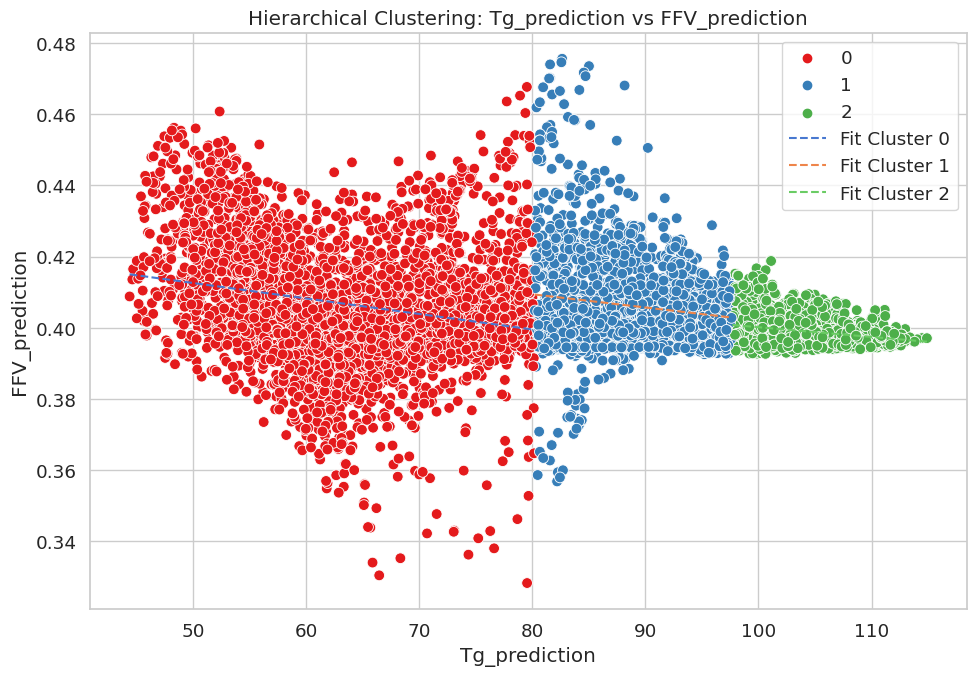

n = 1 m = 3


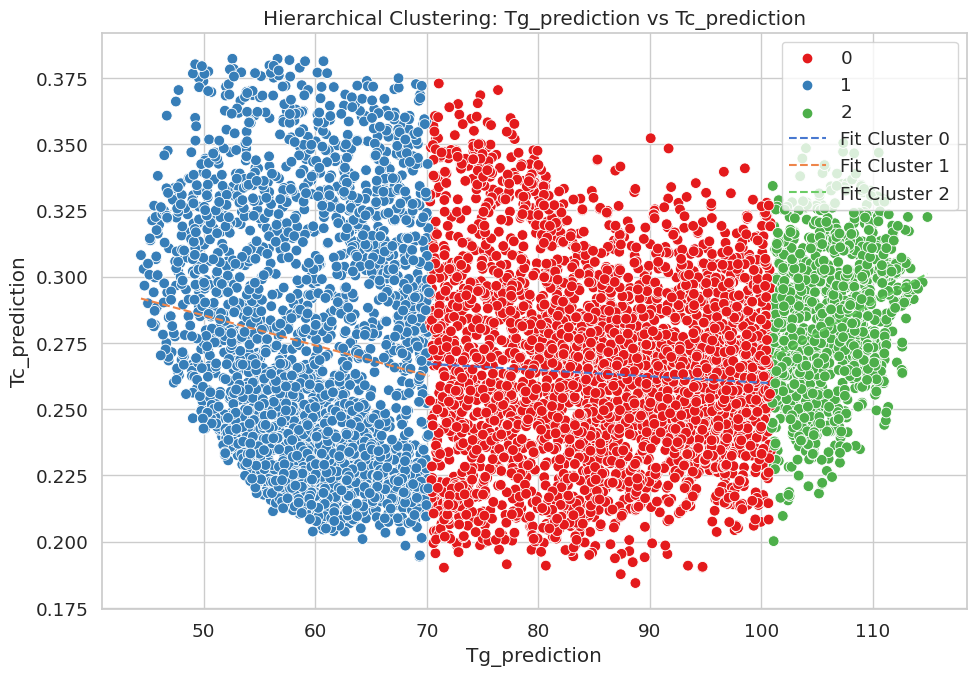

n = 1 m = 4


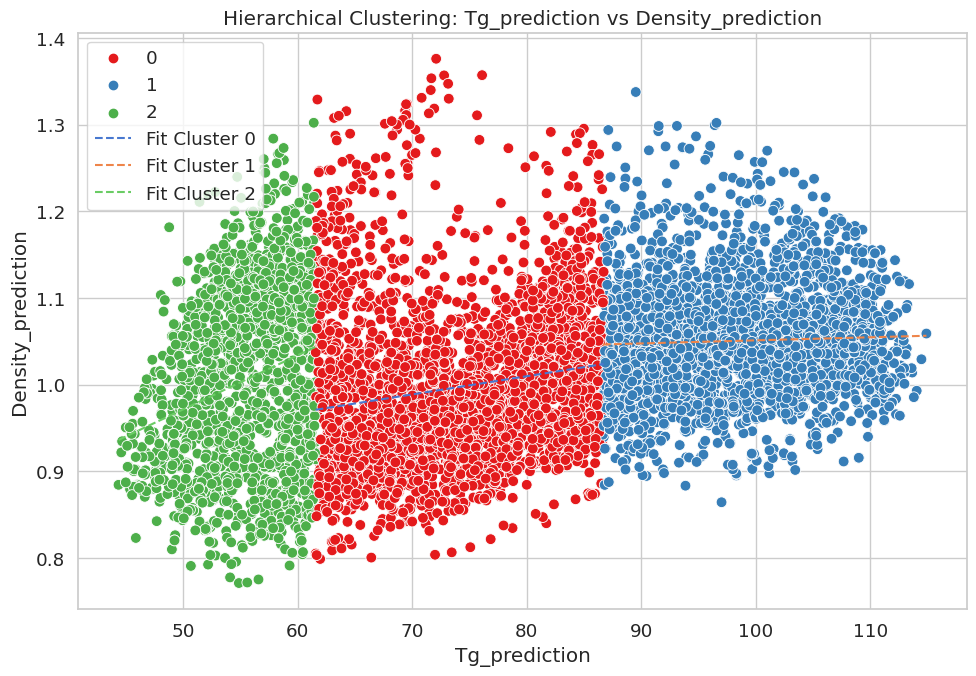

n = 1 m = 5


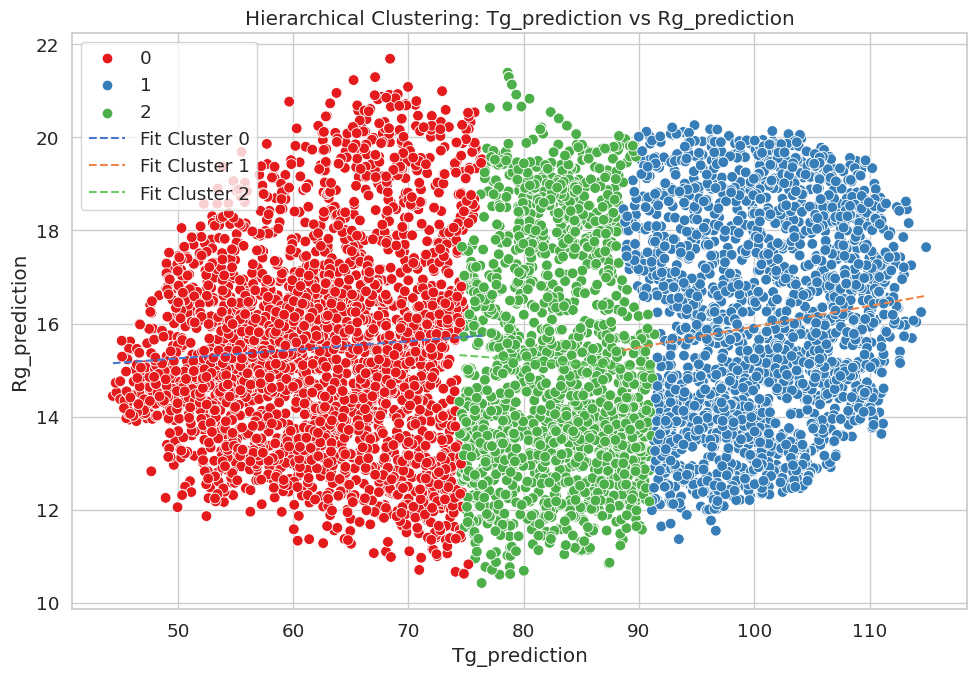

n = 2 m = 6


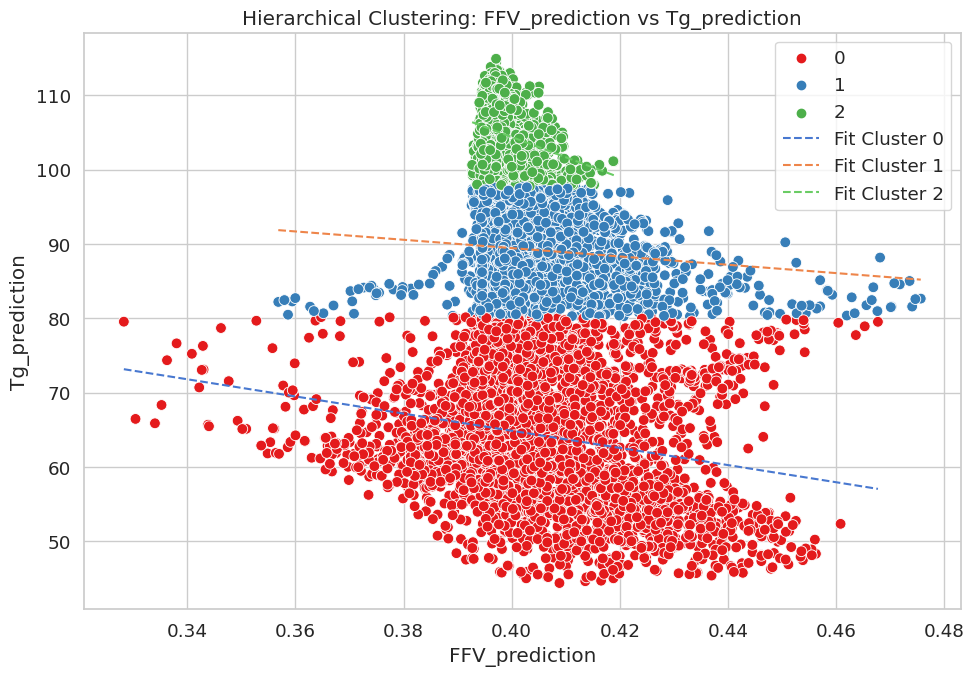

n = 2 m = 7
n = 2 m = 8


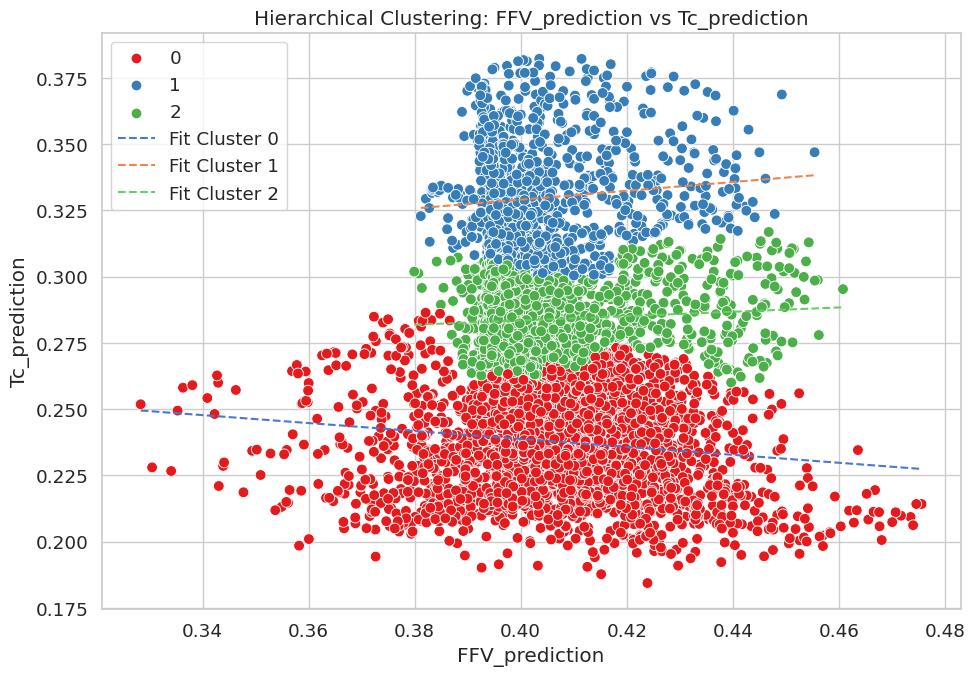

n = 2 m = 9


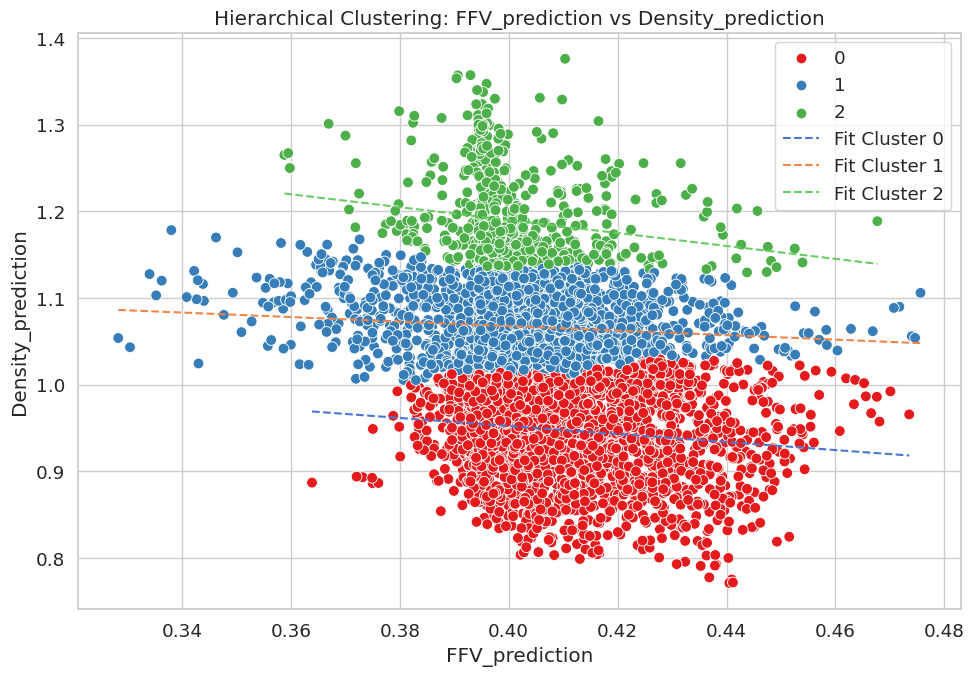

n = 2 m = 10


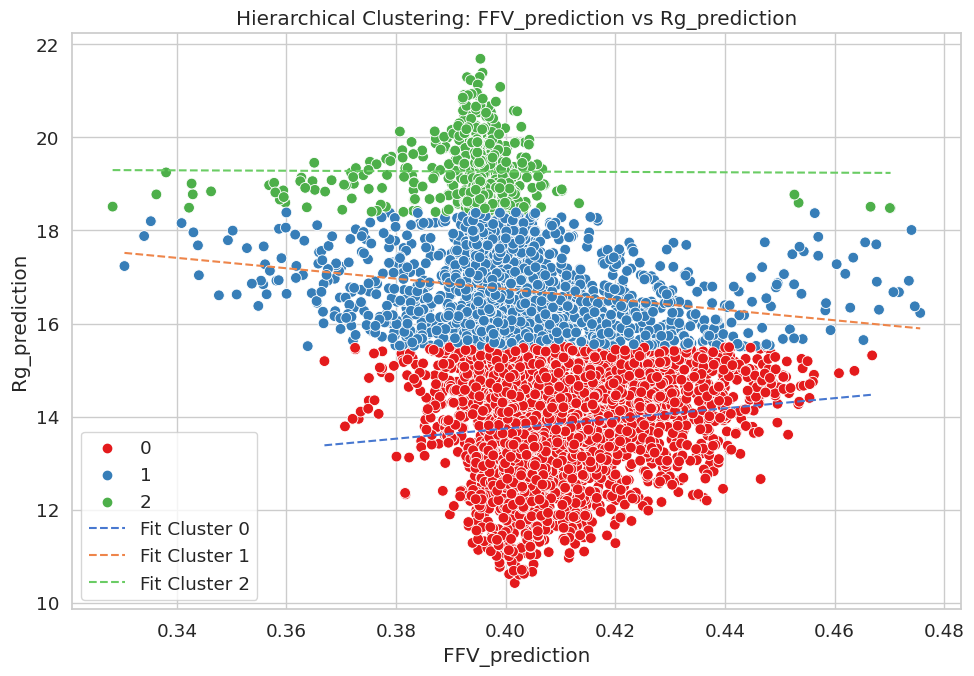

🎨 🌠 - 10 Scatter + hierarchical Clustering + poly1d Plots 


In [44]:
m = 0
n=0
run=True
while run:
    for i in df_final_pred.filter(like='prediction').columns:
        n+=1
        for j in df_final_pred.filter(like='prediction').columns:
            m+=1
            print(f'n = {n} m = {m}')
            if i != j:  # אם לא רוצים זוגות זהים
                create_hierarchical_clustered_scatterplot(df_final_pred, i, j)
        
        if m>6 and n==2 :
            run=False
            print(f'🎨 🌠 - {m} Scatter + hierarchical Clustering + poly1d Plots ')
            break
        
            

In [45]:
'''
id,Tg,FFV,Tc,Density,Rg
   2112371,0.0,0.0,0.0,0.0,0.0
   2021324,0.0,0.0,0.0,0.0,0.0
   343242,0.0,0.0,0.0,0.0,0.0
'''

'\nid,Tg,FFV,Tc,Density,Rg\n   2112371,0.0,0.0,0.0,0.0,0.0\n   2021324,0.0,0.0,0.0,0.0,0.0\n   343242,0.0,0.0,0.0,0.0,0.0\n'

In [46]:
list_target = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
# יוצרים מטריצת פיצ'רים עבור ניבוי
df_t_pred = df_features_train.copy()
df_t_pred_lr = df_features_train.copy()
df_t_pred_rf = df_features_train.copy()
df_t_pred_gb = df_features_train.copy()

X_t_pred = df_train_process.drop(columns=['SMILES'])
predictionS = [X_t_pred.copy() for _ in range(len(list_target))]

# ניבוי לפי המודלים
for i, name in enumerate(list_target):    
    predictionS[i][f'{name}_prediction_svr'] = models[i]['svr'].predict(scalers[i]['svr'].fit_transform(X_t_pred))
    predictionS[i][f'{name}_prediction_lr'] = models[i]['linear_regression'].predict(scalers[i]['linear_regression'].fit_transform(X_t_pred))
    predictionS[i][f'{name}_prediction_rf'] = models[i]['random_forest'].predict(scalers[i]['random_forest'].fit_transform(X_t_pred))
    predictionS[i][f'{name}_prediction_gb'] = models[i]['gradient_boosting'].predict(scalers[i]['gradient_boosting'].fit_transform(X_t_pred))

In [47]:
predictionS[0]

MolWt  NumAromaticRings  NumRings  FractionCSP3  NumRotatableBonds  \
0   232.323                 1         1      0.533333                  8   
1   598.919                 4         5      0.441860                 16   
2  1003.207                 8        10      0.145161                 15   

     TPSA  HBA  HBD  BalabanJ  MolLogP  Tg_prediction_svr  Tg_prediction_lr  \
0   26.30    2    0  2.563477   3.9817          62.934594         39.337296   
1   24.06    2    2  1.451540  12.3596          67.858314         96.401626   
2  122.27    9    0  0.743739  14.2170         106.240557        164.064205   

   Tg_prediction_rf  Tg_prediction_gb  
0         53.301372         74.228775  
1         40.861871          5.989462  
2        184.324524         76.302524

In [48]:
for i in range(len(predictionS)):
    predictionS[i] = predictionS[i].iloc[:, -4:]


In [49]:
predictionS[0].describe()

Tg_prediction_svr  Tg_prediction_lr  Tg_prediction_rf  Tg_prediction_gb
count           3.000000          3.000000          3.000000          3.000000
mean           79.011155         99.934376         92.829256         52.173587
std            23.709513         62.438455         79.480963         40.010063
min            62.934594         39.337296         40.861871          5.989462
25%            65.396454         67.869461         47.081621         40.109119
50%            67.858314         96.401626         53.301372         74.228775
75%            87.049436        130.232915        118.812948         75.265650
max           106.240557        164.064205        184.324524         76.302524

In [50]:
predictionS[1].describe()

FFV_prediction_svr  FFV_prediction_lr  FFV_prediction_rf  \
count            3.000000           3.000000           3.000000   
mean             0.392747           0.366947           0.358876   
std              0.019815           0.003830           0.008822   
min              0.371023           0.363859           0.348824   
25%              0.384206           0.364804           0.355647   
50%              0.397388           0.365749           0.362470   
75%              0.403609           0.368490           0.363902   
max              0.409829           0.371232           0.365334   

       FFV_prediction_gb  
count           3.000000  
mean            0.370040  
std             0.002556  
min             0.367494  
25%             0.368757  
50%             0.370021  
75%             0.371313  
max             0.372606

In [51]:
predictionS[2].describe()

Tc_prediction_svr  Tc_prediction_lr  Tc_prediction_rf  Tc_prediction_gb
count           3.000000          3.000000          3.000000          3.000000
mean            0.279726          0.259266          0.252935          0.249153
std             0.068897          0.131865          0.102143          0.130458
min             0.202644          0.123201          0.144967          0.104170
25%             0.251932          0.195657          0.205386          0.195200
50%             0.301221          0.268112          0.265805          0.286231
75%             0.318267          0.327298          0.306919          0.321644
max             0.335313          0.386484          0.348033          0.357058

In [52]:
predictionS[3].describe()

Density_prediction_svr  Density_prediction_lr  Density_prediction_rf  \
count                3.000000               3.000000               3.000000   
mean                 1.055670               0.977557               1.059733   
std                  0.159241               0.154787               0.138435   
min                  0.877931               0.803382               0.906220   
25%                  0.990837               0.916647               1.002057   
50%                  1.103744               1.029913               1.097894   
75%                  1.144539               1.064645               1.136489   
max                  1.185335               1.099377               1.175084   

       Density_prediction_gb  
count               3.000000  
mean                1.020024  
std                 0.094141  
min                 0.917814  
25%                 0.978444  
50%                 1.039073  
75%                 1.071128  
max                 1.103183

In [53]:
predictionS[4].describe()

Rg_prediction_svr  Rg_prediction_lr  Rg_prediction_rf  Rg_prediction_gb
count           3.000000          3.000000          3.000000          3.000000
mean           16.772919         16.341423         19.040942         18.258385
std             0.933597          4.376882          2.177217          2.047809
min            16.090699         11.462518         16.734372         16.758281
25%            16.240931         14.550663         18.031264         17.091875
50%            16.391162         17.638808         19.328155         17.425469
75%            17.114029         18.780875         20.194226         19.008437
max            17.836895         19.922942         21.060297         20.591405

In [54]:
for i in range(5):
    predictionS[i]['id'] = df_test['id']
predictionS[0]

Tg_prediction_svr  Tg_prediction_lr  Tg_prediction_rf  Tg_prediction_gb  \
0          62.934594         39.337296         53.301372         74.228775   
1          67.858314         96.401626         40.861871          5.989462   
2         106.240557        164.064205        184.324524         76.302524   

           id  
0  1109053969  
1  1422188626  
2  2032016830

In [55]:
predictionS

[   Tg_prediction_svr  Tg_prediction_lr  Tg_prediction_rf  Tg_prediction_gb  \
 0          62.934594         39.337296         53.301372         74.228775   
 1          67.858314         96.401626         40.861871          5.989462   
 2         106.240557        164.064205        184.324524         76.302524   
 
            id  
 0  1109053969  
 1  1422188626  
 2  2032016830  ,
    FFV_prediction_svr  FFV_prediction_lr  FFV_prediction_rf  \
 0            0.371023           0.365749           0.348824   
 1            0.409829           0.363859           0.365334   
 2            0.397388           0.371232           0.362470   
 
    FFV_prediction_gb          id  
 0           0.372606  1109053969  
 1           0.367494  1422188626  
 2           0.370021  2032016830  ,
    Tc_prediction_svr  Tc_prediction_lr  Tc_prediction_rf  Tc_prediction_gb  \
 0           0.202644          0.123201          0.144967          0.104170   
 1           0.335313          0.386484          0.3

In [56]:
model_predict = []
for predict_target in predictionS:
    print(predict_target)

   Tg_prediction_svr  Tg_prediction_lr  Tg_prediction_rf  Tg_prediction_gb  \
0          62.934594         39.337296         53.301372         74.228775   
1          67.858314         96.401626         40.861871          5.989462   
2         106.240557        164.064205        184.324524         76.302524   

           id  
0  1109053969  
1  1422188626  
2  2032016830  
   FFV_prediction_svr  FFV_prediction_lr  FFV_prediction_rf  \
0            0.371023           0.365749           0.348824   
1            0.409829           0.363859           0.365334   
2            0.397388           0.371232           0.362470   

   FFV_prediction_gb          id  
0           0.372606  1109053969  
1           0.367494  1422188626  
2           0.370021  2032016830  
   Tc_prediction_svr  Tc_prediction_lr  Tc_prediction_rf  Tc_prediction_gb  \
0           0.202644          0.123201          0.144967          0.104170   
1           0.335313          0.386484          0.348033          0.357058

In [57]:
model = ['svr' , 'lr' , 'rf' , 'gb']
Dict = {}
for my_model in model:
    dictFinal = {}
    dictFinal['id'] = df_test['id']
    for i,target in enumerate(list_target):
        dictFinal[target]=predictionS[i][f'{target}_prediction_{my_model}']
    Dict[my_model] = pd.DataFrame(dictFinal)

In [58]:
modeList = list(Dict.keys())

In [59]:
print(f'Model name - {modeList[0]}')
Dict[modeList[0]]

Model name - svr


id          Tg       FFV        Tc   Density         Rg
0  1109053969   62.934594  0.371023  0.202644  1.185335  16.391162
1  1422188626   67.858314  0.409829  0.335313  0.877931  16.090699
2  2032016830  106.240557  0.397388  0.301221  1.103744  17.836895

In [60]:
print(f'Model name - {modeList[1]}')
Dict[modeList[1]]

Model name - lr


id          Tg       FFV        Tc   Density         Rg
0  1109053969   39.337296  0.365749  0.123201  1.099377  11.462518
1  1422188626   96.401626  0.363859  0.386484  0.803382  19.922942
2  2032016830  164.064205  0.371232  0.268112  1.029913  17.638808

In [61]:
print(f'Model name - {modeList[2]}')
Dict[modeList[2]]

Model name - rf


id          Tg       FFV        Tc   Density         Rg
0  1109053969   53.301372  0.348824  0.144967  1.175084  21.060297
1  1422188626   40.861871  0.365334  0.348033  0.906220  19.328155
2  2032016830  184.324524  0.362470  0.265805  1.097894  16.734372

In [62]:
print(f'Model name - {modeList[3]}')
Dict[modeList[3]]

Model name - gb


id         Tg       FFV        Tc   Density         Rg
0  1109053969  74.228775  0.372606  0.104170  1.039073  20.591405
1  1422188626   5.989462  0.367494  0.357058  0.917814  16.758281
2  2032016830  76.302524  0.370021  0.286231  1.103183  17.425469

In [63]:
FinalForm_dataSubmissiom = Dict[modeList[2]]
FinalForm_dataSubmissiom

id          Tg       FFV        Tc   Density         Rg
0  1109053969   53.301372  0.348824  0.144967  1.175084  21.060297
1  1422188626   40.861871  0.365334  0.348033  0.906220  19.328155
2  2032016830  184.324524  0.362470  0.265805  1.097894  16.734372

In [64]:
submission = pd.DataFrame(FinalForm_dataSubmissiom)
submission.to_csv('submission.csv',index=False)

submission


id          Tg       FFV        Tc   Density         Rg
0  1109053969   53.301372  0.348824  0.144967  1.175084  21.060297
1  1422188626   40.861871  0.365334  0.348033  0.906220  19.328155
2  2032016830  184.324524  0.362470  0.265805  1.097894  16.734372